Dataset loaded successfully. First 5 rows:
   Height   Weight  Age  Gripstrength  Unnamed: 4 Frailty
0     65.8     112   30            30         NaN       N
1     71.5     136   19            31         NaN       N
2     69.4     153   45            29         NaN       N
3     68.2     142   22            28         NaN       Y
4     67.8     144   29            24         NaN       Y
Column names: ['Height ', 'Weight', 'Age', 'Gripstrength', 'Unnamed: 4', 'Frailty']
Available sheets: ['Sheet1']
'Frailty' column converted successfully!
Unique values in 'Frailty' after conversion: [0 1]
Checking first 20 rows for hidden blanks:
   Height  Weight  Age  Gripstrength  Unnamed: 4  Frailty
0    65.8     112   30            30         NaN        0
1    71.5     136   19            31         NaN        0
2    69.4     153   45            29         NaN        0
3    68.2     142   22            28         NaN        1
4    67.8     144   29            24         NaN        1
5    68.7     

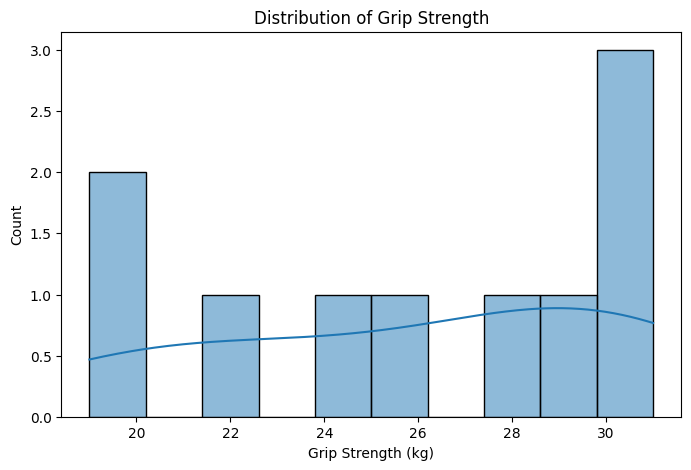

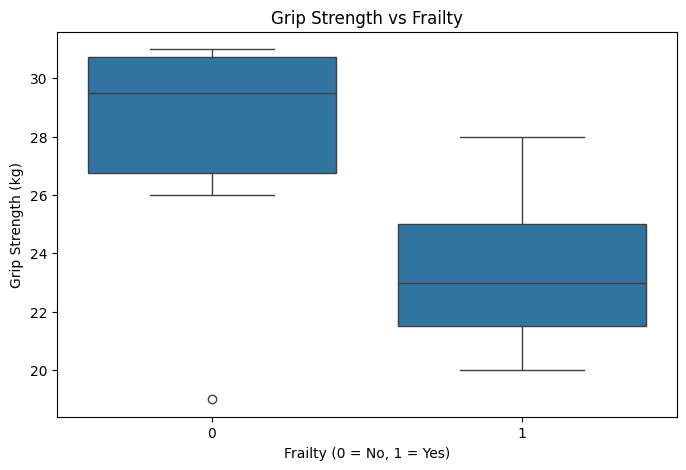

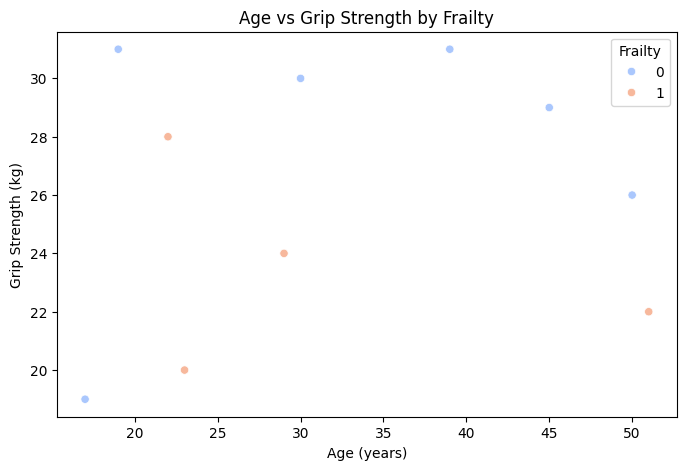

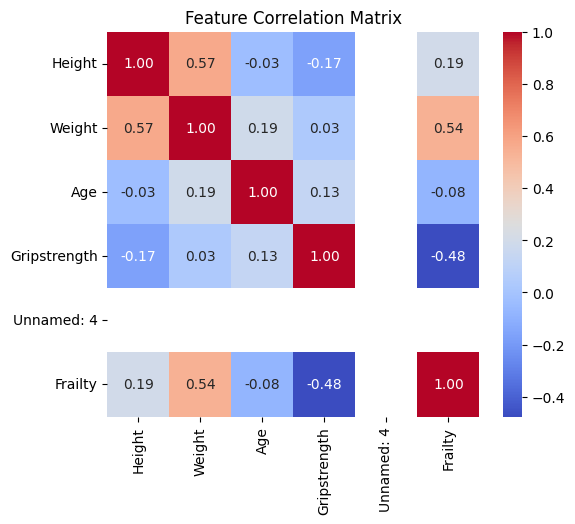

Exploratory Data Analysis Completed.


In [18]:




import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset from Excel file with debugging
df = pd.read_excel("/content/RAW_DATA.xlsx")

# Debugging: Check if data is loaded
print("Dataset loaded successfully. First 5 rows:")
print(df.head())

# Debugging: Check column names
print("Column names:", df.columns.tolist())

# Step 2: Ensure correct sheet is read (if multiple sheets exist)
xls = pd.ExcelFile("/content/RAW_DATA.xlsx")
print("Available sheets:", xls.sheet_names)
df = pd.read_excel("/content/RAW_DATA.xlsx", sheet_name=0)  # Adjust sheet_name if needed

# Step 3: Standardize column names to remove extra spaces
df.columns = df.columns.str.strip()

# Step 4: Convert categorical values to binary if 'Frailty' column exists
if 'Frailty' in df.columns:
    df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})
    print("'Frailty' column converted successfully!")
else:
    print("Error: 'Frailty' column not found!")

# Debugging: Check if data conversion worked
if 'Frailty' in df.columns:
    print("Unique values in 'Frailty' after conversion:", df['Frailty'].unique())

# Step 5: Check for hidden blank rows
print("Checking first 20 rows for hidden blanks:")
print(df.head(20))

# Step 6: Drop only FULLY empty rows
print("Rows before dropna:", len(df))
df = df.dropna(how='all')
print("Rows after dropna:", len(df))

# Step 7: Save cleaned data
df.to_csv("/content/frailty_cleaned.csv", index=False)
print("Cleaned dataset saved at /content/frailty_cleaned.csv")

# Step 8: Verify the saved file
df_cleaned = pd.read_csv("/content/frailty_cleaned.csv")
print("Cleaned Data Preview:")
print(df_cleaned.head(10))

# Step 9: Exploratory Data Analysis (EDA)
## Print column names to verify correct references
print("Updated Column Names:", df.columns.tolist())

## Auto-detect 'Grip Strength' column
grip_col = [col for col in df.columns if "grip" in col.lower()]
if grip_col:
    grip_col = grip_col[0]  # Use the first matching column
    print(f"Using column '{grip_col}' for Grip Strength analysis")
else:
    print("Error: No matching column found for Grip Strength!")
    grip_col = None

## Distribution of Grip Strength
if grip_col:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[grip_col], bins=10, kde=True)
    plt.title("Distribution of Grip Strength")
    plt.xlabel("Grip Strength (kg)")
    plt.ylabel("Count")
    plt.show()

## Boxplot of Grip Strength by Frailty
if grip_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Frailty'], y=df[grip_col])
    plt.title("Grip Strength vs Frailty")
    plt.xlabel("Frailty (0 = No, 1 = Yes)")
    plt.ylabel("Grip Strength (kg)")
    plt.show()

## Scatter Plot of Age vs Grip Strength with Frailty Hue
if grip_col:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df['Age'], y=df[grip_col], hue=df['Frailty'], palette='coolwarm')
    plt.title("Age vs Grip Strength by Frailty")
    plt.xlabel("Age (years)")
    plt.ylabel("Grip Strength (kg)")
    plt.show()

## Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

print("Exploratory Data Analysis Completed.")